# Import FloorplantoBlenderlib

In [2]:
# Add outer folder 
import sys
sys.path.append("..") # Adds higher directory to python modules path.

# Import library
# from FloorplanToBlenderLib import *
import detect

# Other necessary libraries
import cv2 # for image gathering
import numpy as np

# for visualize
from PIL import Image
from IPython.display import display


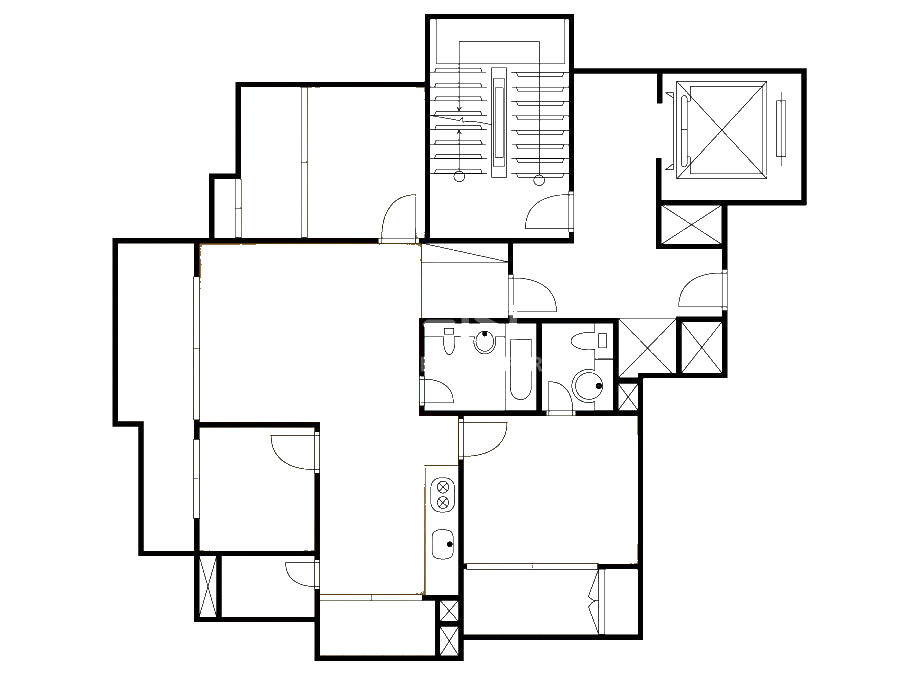

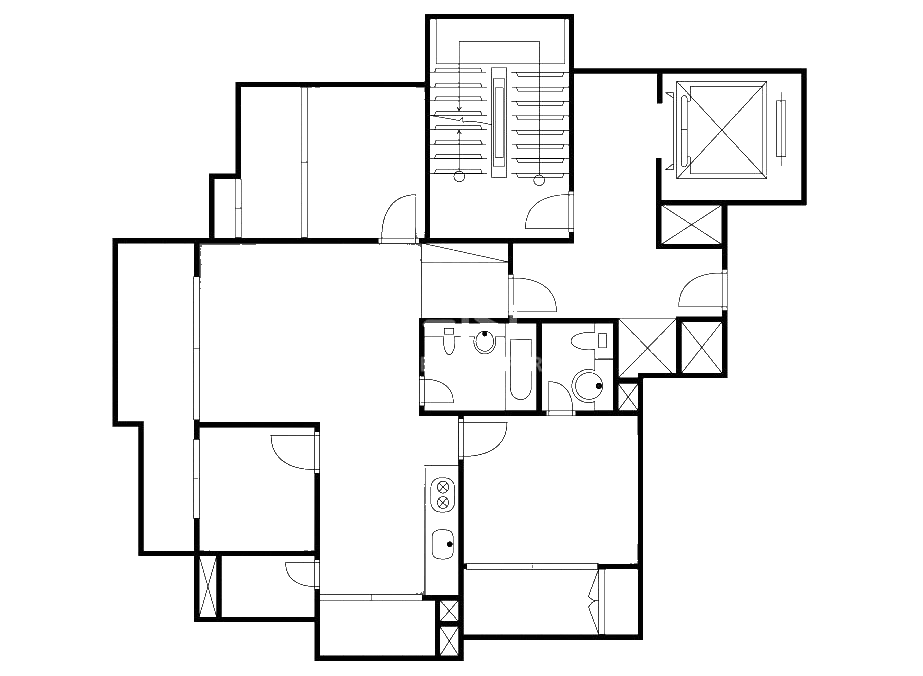

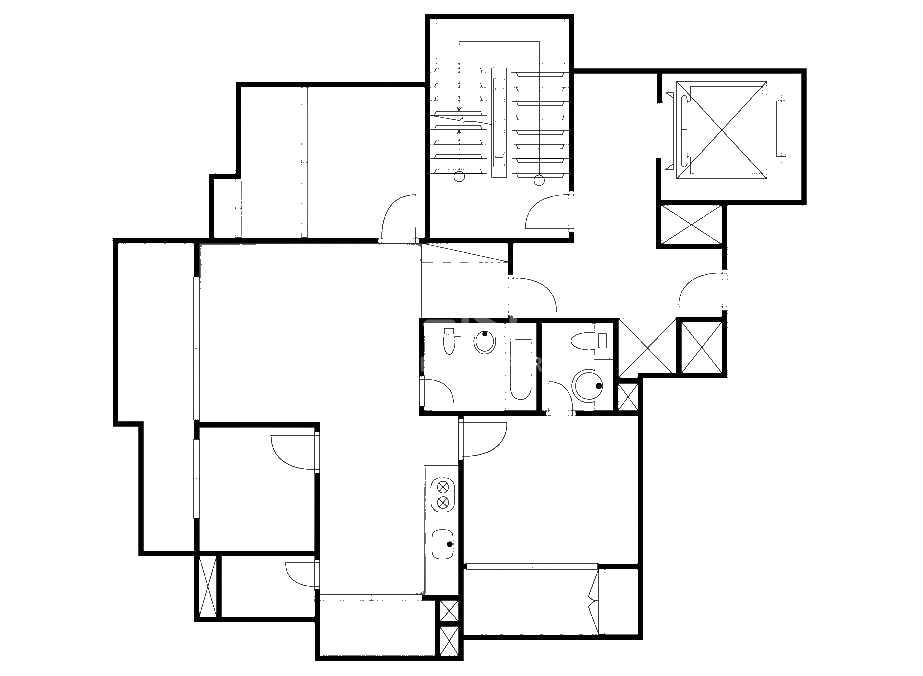

In [4]:
# 이미지 읽기
img_path = "../OCR/OCR_img.png"
# img_path = "example.png"
img = cv2.imread(img_path)

display(Image.fromarray(img))

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(Image.fromarray(gray_image))

# 그레이스케일에 적합한 하한값과 상한값 설정
lower_bound = 0   # 예를 들어, 검은색
upper_bound = 120 # 밝은 회색으로 가정

# 단일 채널에 대한 마스크 생성
mask = cv2.inRange(gray_image, lower_bound, upper_bound)

# 마스크를 사용하여 원하는 픽셀을 하얗게 만들기
gray_image[np.where(mask == 0)] = 255  # np.where 조건에 맞지 않는 곳은 흰색(255)으로 설정

display(Image.fromarray(gray_image))

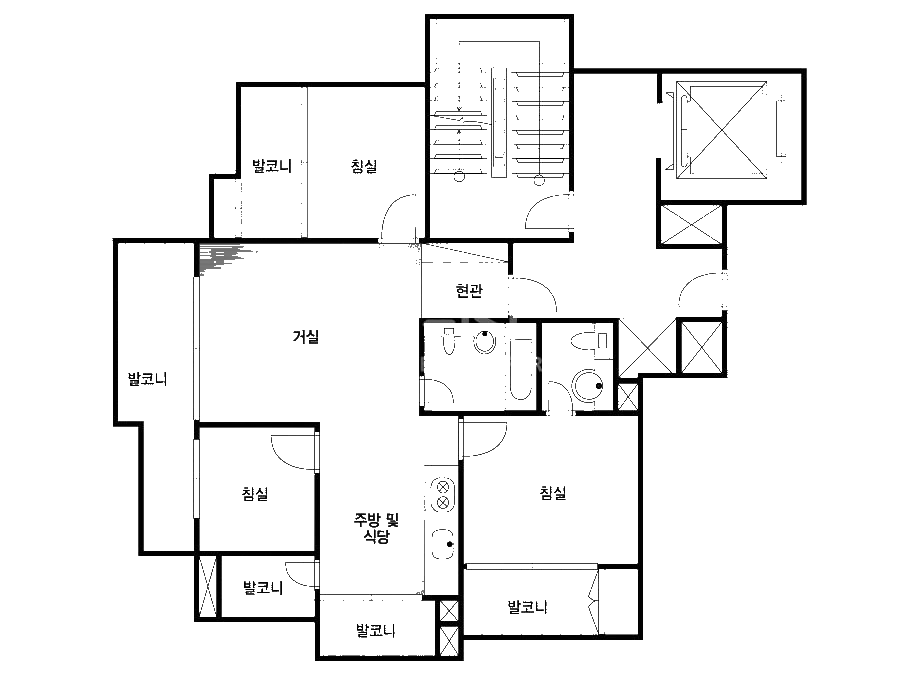

In [37]:
# 그레이스케일에 적합한 하한값과 상한값 설정
lower_bound = 0   # 예를 들어, 검은색
upper_bound = 150 # 밝은 회색으로 가정

# 단일 채널에 대한 마스크 생성
mask = cv2.inRange(gray_image, lower_bound, upper_bound)

# 마스크를 사용하여 원하는 픽셀을 하얗게 만들기
gray_image[np.where(mask == 0)] = 255  # np.where 조건에 맞지 않는 곳은 흰색(255)으로 설정

display(Image.fromarray(gray_image))

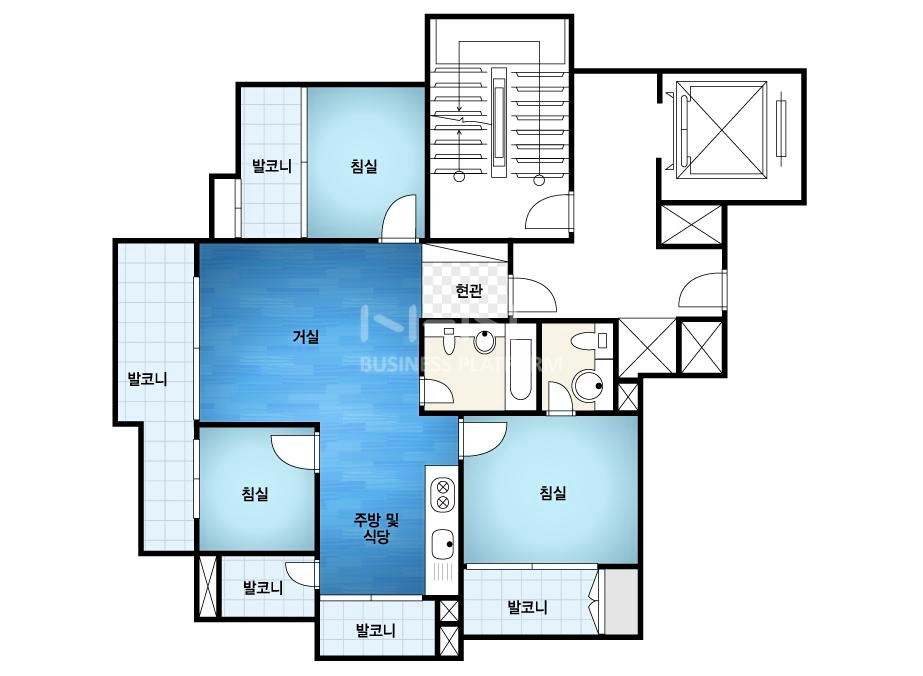

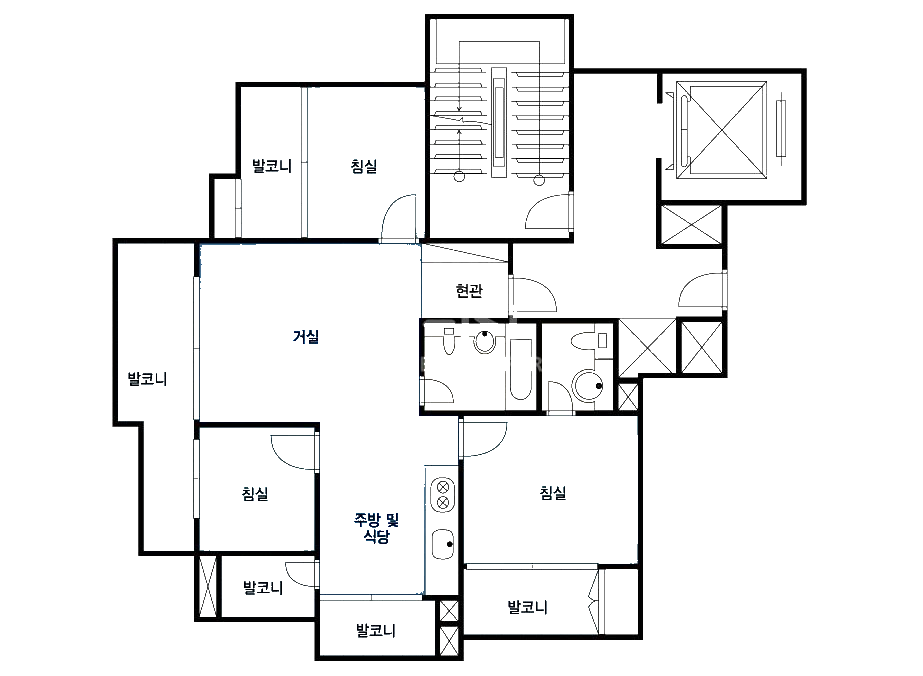

In [38]:
# 이미지 읽기
img_path = "Test_img2.jpg"
# img_path = "example.png"
img = cv2.imread(img_path)

display(Image.fromarray(img))

lower_bound = np.array([0, 0, 0], dtype=np.uint8)
upper_bound = np.array([150, 150, 150], dtype=np.uint8)
mask = cv2.inRange(img, lower_bound, upper_bound)
img[np.where(mask == 0)] = [255, 255, 255]

# Display
display(Image.fromarray(img))

In [39]:
# # 그레이스케일에 적합한 하한값과 상한값 설정
# lower_bound = 0   # 예를 들어, 검은색
# upper_bound = 170 # 밝은 회색으로 가정

# # 단일 채널에 대한 마스크 생성
# mask = cv2.inRange(gray_image, lower_bound, upper_bound)

# # 마스크를 사용하여 원하는 픽셀을 하얗게 만들기
# gray_image[np.where(mask == 0)] = 255  # np.where 조건에 맞지 않는 곳은 흰색(255)으로 설정

# display(Image.fromarray(gray_image))

In [40]:
# lower_bound = np.array([0, 0, 0], dtype=np.uint8)
# upper_bound = np.array([170, 170, 170], dtype=np.uint8)
# mask = cv2.inRange(gray_image, lower_bound, upper_bound)
# gray_image[np.where(mask == 0)] = [255, 255, 255]

# # Display
# display(Image.fromarray(gray_image))

In [41]:
# img_path = "Test_img2.jpg"
# # 이미지 파일 불러오기
# image = cv2.imread(img_path)

# # 이미지를 grayscale로 변환하여 색상 정보 분리
# gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# # 컬러 이미지와 흑백 이미지의 차이를 계산하여 컬러 부분 확인
# difference = cv2.subtract(image, cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR))

# # 차이가 있는(색상이 있는) 부분의 마스크 생성
# _, mask = cv2.threshold(cv2.cvtColor(difference, cv2.COLOR_BGR2GRAY), 1, 255, cv2.THRESH_BINARY)

# # 컬러가 있는 영역을 흰색으로 설정
# colored_part = np.where(mask == 255)
# image[colored_part[0], colored_part[1], :] = [255, 255, 255]

# # 변경된 이미지 저장
# # display(Image.fromarray(image))

# Detect Contours

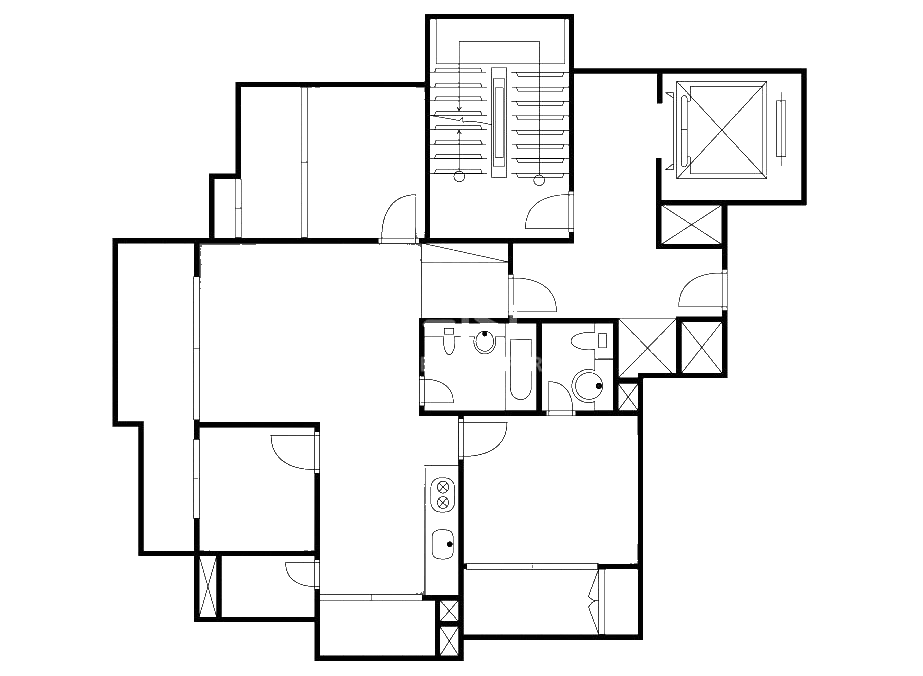

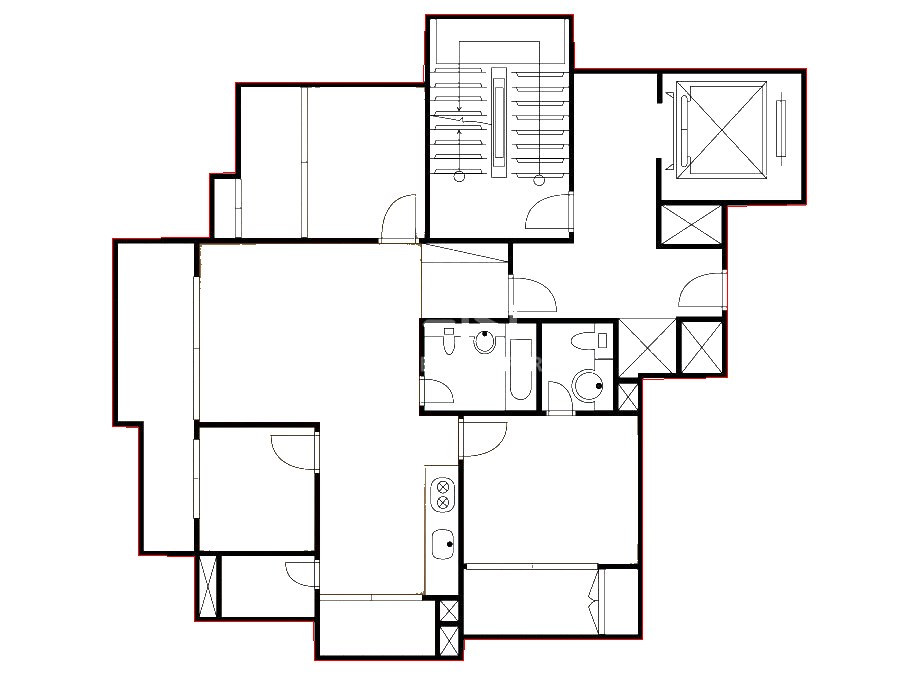

In [5]:
# # img_path = "Images/Examples/example.png"
# img_path = "Images/Test_img/Test_img1.jpg"

# # Read floorplan image
# img = cv2.imread(img_path)

# Create blank image
height, width, channels = img.shape
blank_image = img.copy()

# Grayscale image
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
display(Image.fromarray(gray))

# detect outer Contours (simple floor or roof solution), paint them red on blank_image
contour, c_img = detect.outer_contours(gray, blank_image, color=(255,0,0))

# Display
display(Image.fromarray(blank_image))

In [6]:
def wall_filter(gray):
    WALL_FILTER_TRESHOLD = [0, 255]
    WALL_FILTER_KERNEL_SIZE = (3, 3)
    WALL_FILTER_MORPHOLOGY_ITERATIONS = 2
    WALL_FILTER_DILATE_ITERATIONS = 1
    WALL_FILTER_DISTANCE = 5
    WALL_FILTER_DISTANCE_THRESHOLD = [0.5, 0.2]
    WALL_FILTER_MAX_VALUE = 255
    WALL_FILTER_THRESHOLD_TECHNIQUE = 0

    _, thresh = cv2.threshold(
        gray,
        WALL_FILTER_TRESHOLD[0],
        WALL_FILTER_TRESHOLD[1],
        cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU,
    )

    # noise removal
    kernel = np.ones(WALL_FILTER_KERNEL_SIZE, np.uint8)
    opening = cv2.morphologyEx(
        thresh,
        cv2.MORPH_OPEN,
        kernel,
        iterations=WALL_FILTER_MORPHOLOGY_ITERATIONS,
    )

    sure_bg = cv2.dilate(
        opening, kernel, iterations=WALL_FILTER_DILATE_ITERATIONS
    )

    dist_transform = cv2.distanceTransform(
        opening, cv2.DIST_L2, WALL_FILTER_DISTANCE
    )
    ret, sure_fg = cv2.threshold(
        WALL_FILTER_DISTANCE_THRESHOLD[0] * dist_transform,
        WALL_FILTER_DISTANCE_THRESHOLD[1] * dist_transform.max(),
        WALL_FILTER_MAX_VALUE,
        WALL_FILTER_THRESHOLD_TECHNIQUE,
    )

    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg, sure_fg)

    return unknown

# Detect Walls

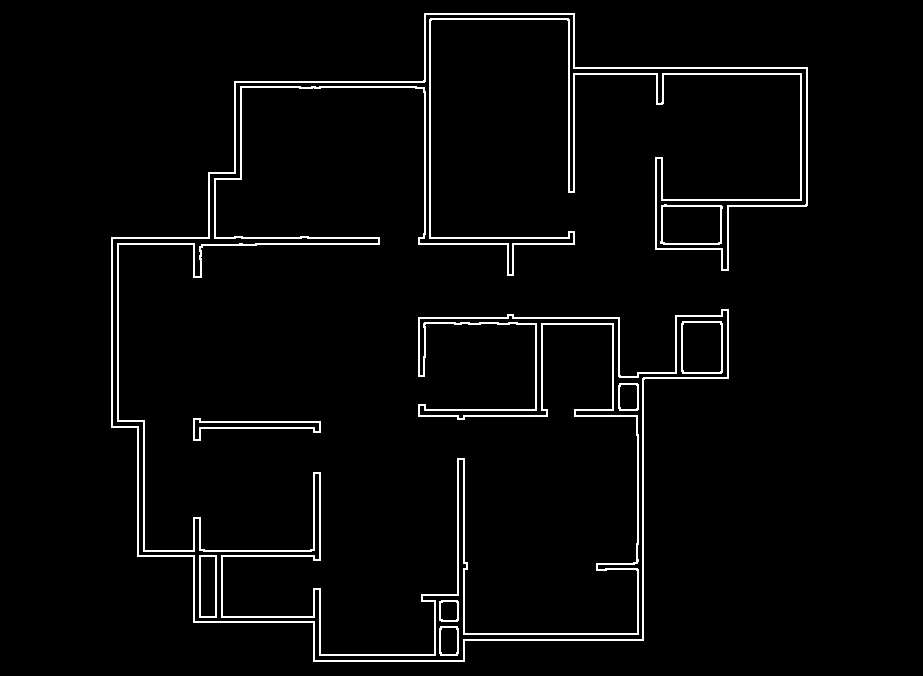

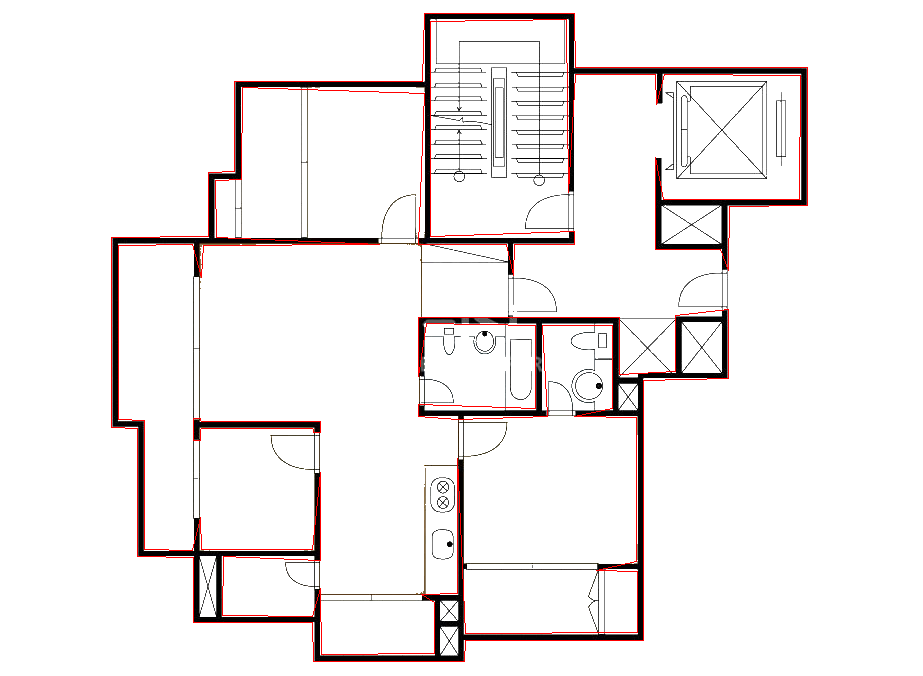

In [7]:
# Create new blank image
blank_image = img.copy()

# Perform filter on grayscaled input image
wall_img = wall_filter(gray)
display(Image.fromarray(wall_img))

boxes, w_img = detect.precise_boxes(wall_img, blank_image, color=[255,0,0])

# # Display
display(Image.fromarray(blank_image))

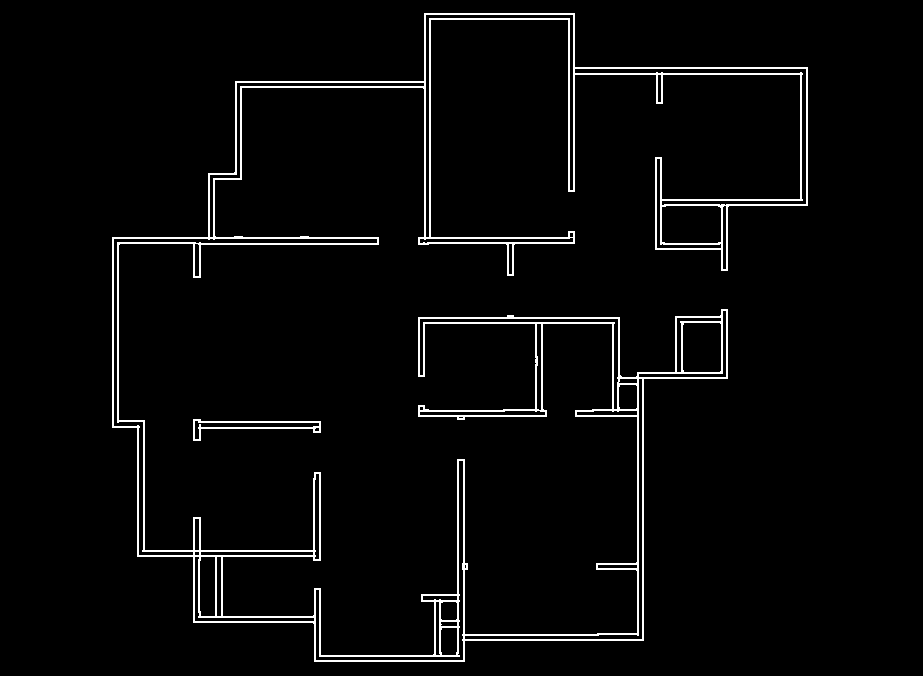

In [87]:
import cv2
import numpy as np

def check_surrounding_pixels(x, y, img):
    height, width = img.shape

    # 상하 체크
    if x - 5 >= 0 and x + 5 < height:
        if img[x - 5, y] == 255 and img[x + 5, y] == 255:
            return True

    # 좌우 체크
    if y - 5 >= 0 and y + 5 < width:
        if img[x, y - 5] == 255 and img[x, y + 5] == 255:
            return True

    return False

# 이미지 불러오기
# img = cv2.imread('wall.png', cv2.IMREAD_GRAYSCALE)
img = wall_img

height, width = img.shape
for x in range(height):
    for y in range(width):
        # 검은 픽셀이고 주변에 흰 픽셀이 있는 경우 흰색으로 변경
        if img[x, y] == 0 and check_surrounding_pixels(x, y, img):
            img[x, y] = 255

# 결과 이미지 저장
display(Image.fromarray(img))


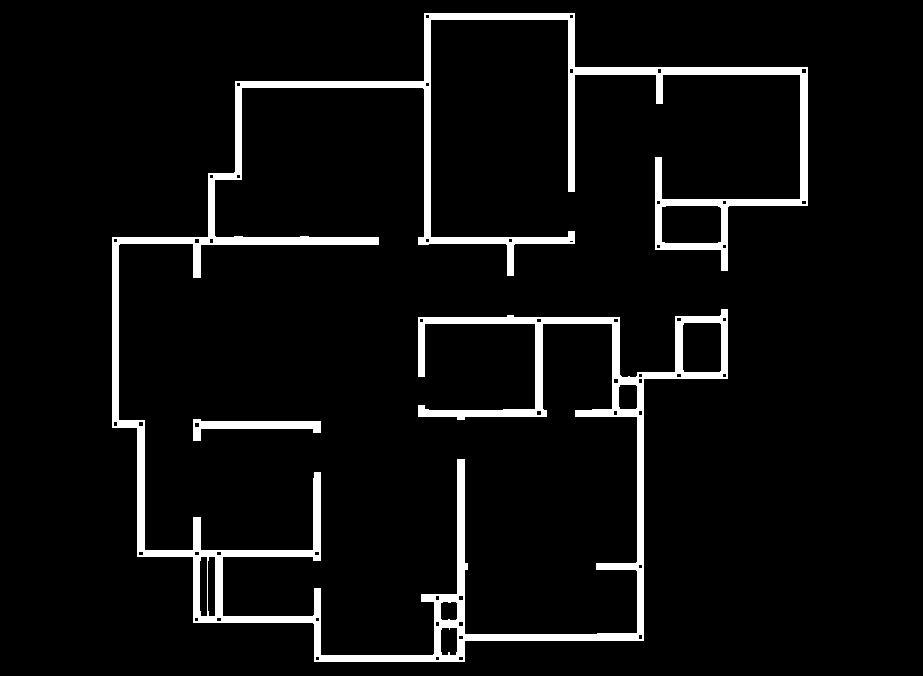

In [90]:
import cv2
import numpy as np

def check_surrounding_pixels(x, y, img, distance=8):
    height, width = img.shape

    # 상하 체크
    if x - distance >= 0 and x + distance < height:
        if any(img[i, y] == 255 for i in range(x - distance, x)) and any(img[i, y] == 255 for i in range(x, x + distance+1)):
            return True

    # 좌우 체크
    if y - distance >= 0 and y + distance < width:
        if any(img[x, i] == 255 for i in range(y - distance, y)) and any(img[x, i] == 255 for i in range(y, y + distance+1)):
            return True

    return False

# 이미지 불러오기
img = cv2.imread('wall2.png', cv2.IMREAD_GRAYSCALE)

height, width = img.shape
change_to_white = [] # 여기에 변경하려는 픽셀의 좌표를 저장합니다.
for x in range(height):
    for y in range(width):
        # 검은 픽셀이고 주변에 흰 픽셀이 있는 경우 리스트에 좌표 저장
        if img[x, y] == 0 and check_surrounding_pixels(x, y, img):
            change_to_white.append((x, y))

# 저장한 좌표를 한 번에 흰색으로 변경
for coord in change_to_white:
    img[coord[0], coord[1]] = 255

# 결과 이미지 출력
display(Image.fromarray(img))


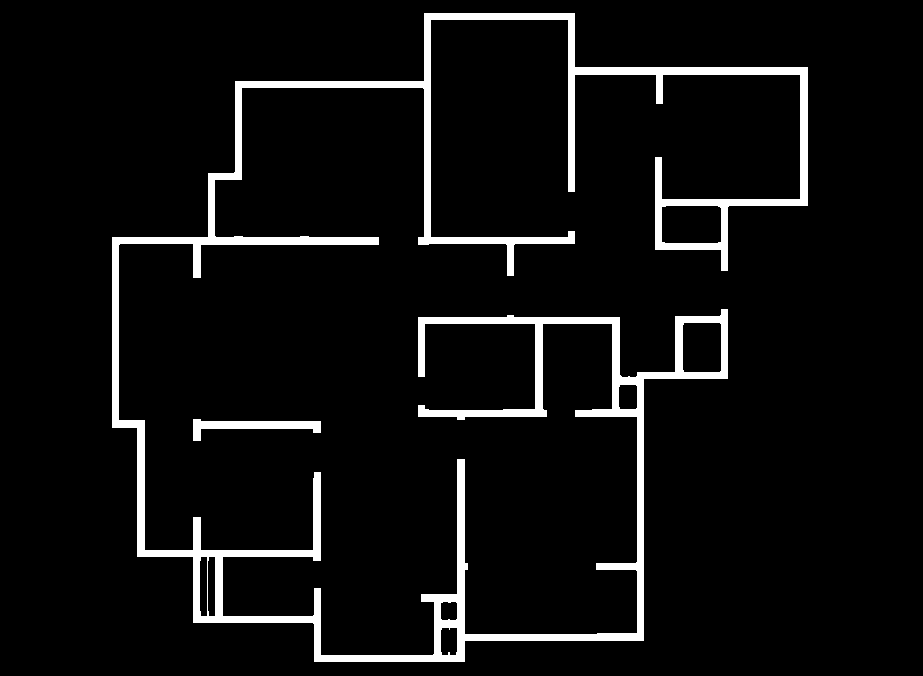

In [91]:
import cv2
import numpy as np
from PIL import Image

# 이미지 불러오기
# img = cv2.imread('path_to_your_image.png', cv2.IMREAD_GRAYSCALE)

# 흰색 선 안의 작은 검은 부분을 흰색으로 바꾸기
kernel = np.ones((5,5),np.uint8)
closed_img = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

# 결과 이미지 저장 또는 출력
# cv2.imwrite('output_closed.png', closed_img)
display(Image.fromarray(closed_img))


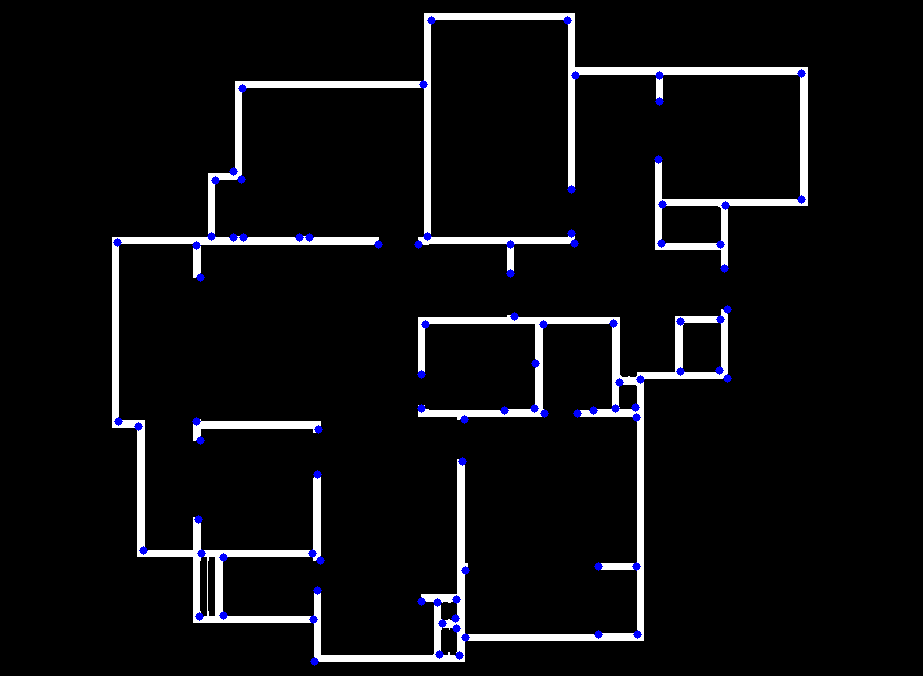

In [92]:
# 원본 흑백 이미지를 BGR 컬러 이미지로 변환
color_img = cv2.cvtColor(closed_img, cv2.COLOR_GRAY2BGR)

corners = cv2.goodFeaturesToTrack(wall_img, maxCorners=100, qualityLevel=0.01, minDistance=10)

# 검출된 코너들에 원 그리기
for corner in corners:
    x, y = map(int, corner.ravel())
    cv2.circle(color_img, (x, y), 4, (0, 0, 255), -1)  # 빨간색 원으로 표시

display(Image.fromarray(color_img))

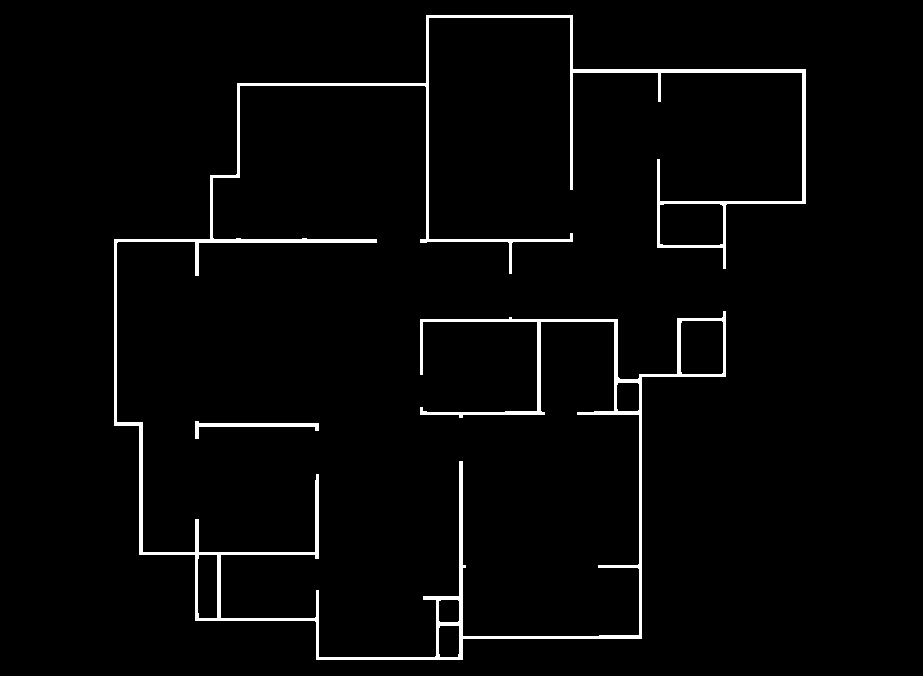

In [93]:
import cv2
import numpy as np
from PIL import Image

# 이미지 불러오기
# img = cv2.imread('path_to_your_image.png', cv2.IMREAD_GRAYSCALE)

# 흰색 선 얇게 만들기
kernel = np.ones((3,3),np.uint8)
eroded_img = cv2.erode(closed_img, kernel, iterations = 2)

# 결과 이미지 저장 또는 출력
# cv2.imwrite('output.png', eroded_img)
display(Image.fromarray(eroded_img))


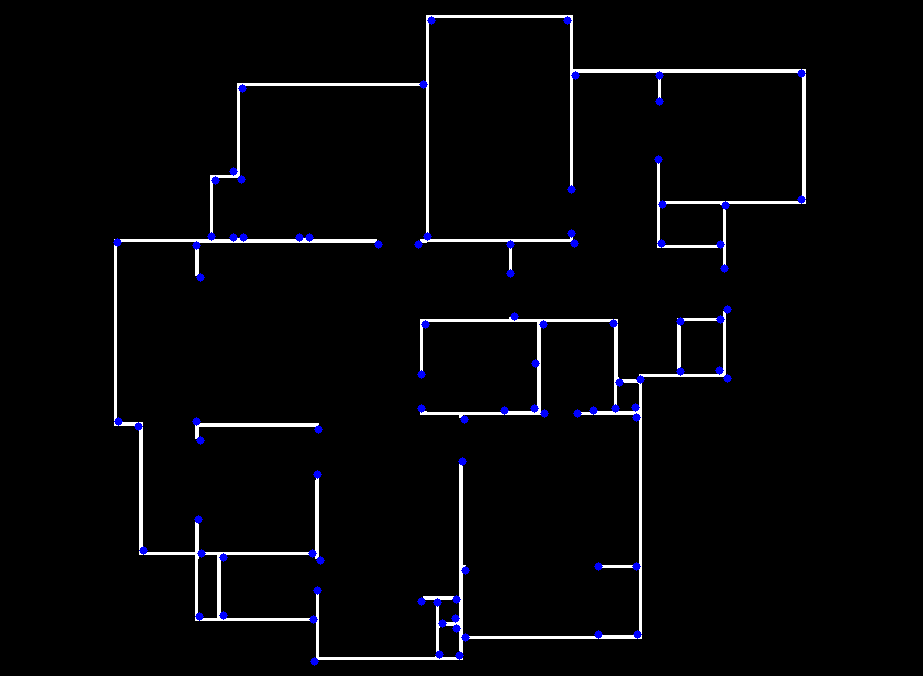

In [94]:
# 원본 흑백 이미지를 BGR 컬러 이미지로 변환
color_img = cv2.cvtColor(eroded_img, cv2.COLOR_GRAY2BGR)

corners = cv2.goodFeaturesToTrack(wall_img, maxCorners=100, qualityLevel=0.01, minDistance=10)

# 검출된 코너들에 원 그리기
for corner in corners:
    x, y = map(int, corner.ravel())
    cv2.circle(color_img, (x, y), 4, (0, 0, 255), -1)  # 빨간색 원으로 표시

display(Image.fromarray(color_img))

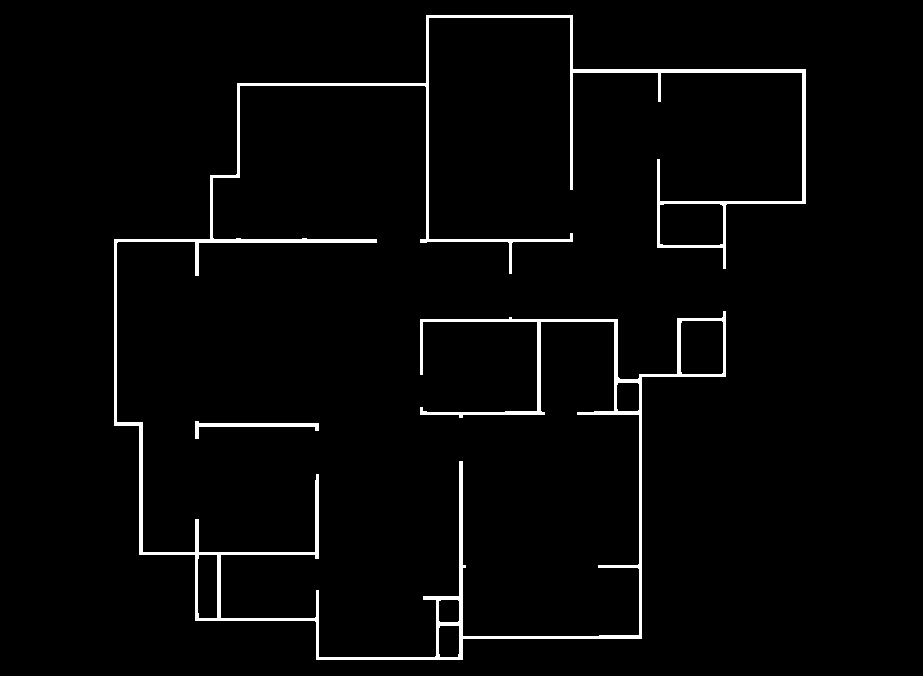

error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'HoughLinesP'
> Overload resolution failed:
>  - argument for HoughLinesP() given by name ('threshold') and position (4)
>  - argument for HoughLinesP() given by name ('threshold') and position (4)


In [98]:
import cv2
import numpy as np

display(Image.fromarray(eroded_img))
# 이미지 불러오기
# img = cv2.imread('fill_wall.png')
color = cv2.cvtColor(eroded_img, cv2.COLOR_GRAY2BGR)
gray = cv2.cvtColor(color, cv2.COLOR_BGR2GRAY)

# 엣지 검출
edges = cv2.Canny(gray, 10, 150)

# 확률적 허프 변환을 사용하여 선 검출
lines = cv2.HoughLinesP(edges, 1, np.pi/180, 30, threshold=1, minLineLength=1, maxLineGap=5)
print(len(lines))
# 각 선에 대한 시작점과 끝점을 초록색으로 그립니다.
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(color, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 결과를 화면에 표시
display(Image.fromarray(color))


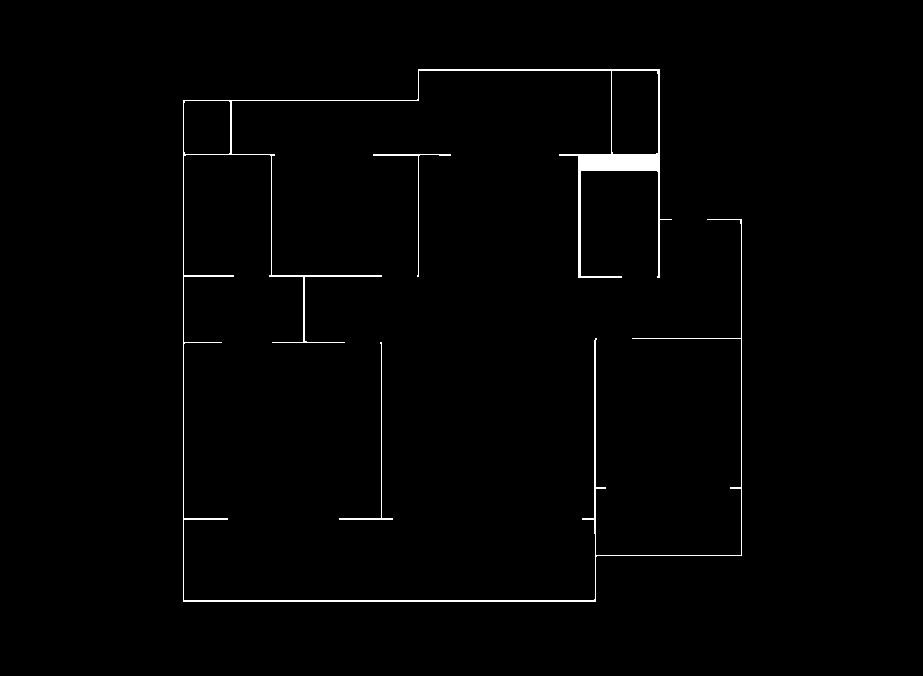

59


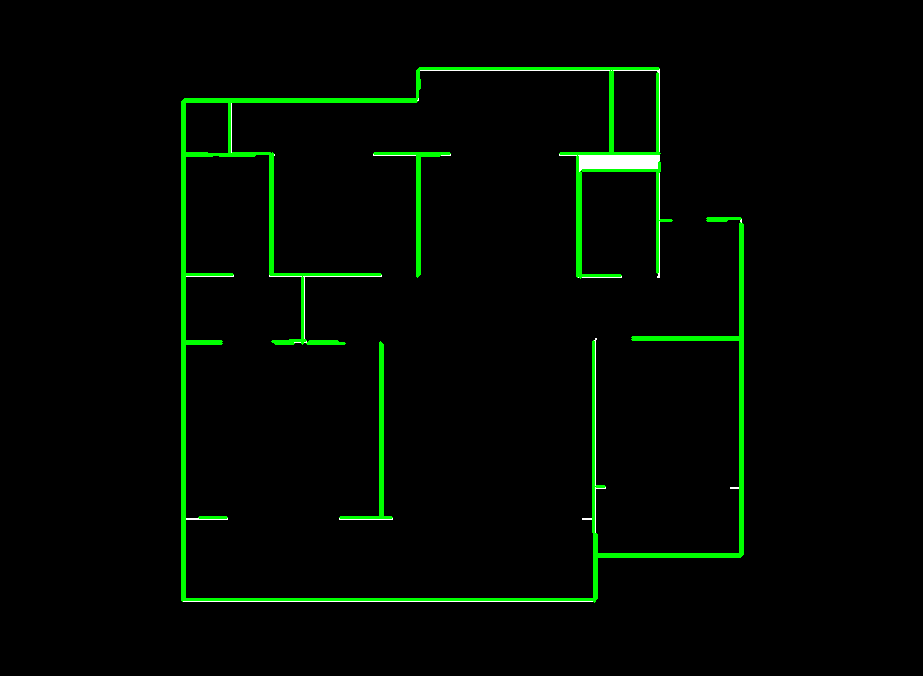

In [70]:
import cv2
import numpy as np

display(Image.fromarray(eroded_img))
# 이미지 불러오기
# img = cv2.imread('fill_wall.png')
color = cv2.cvtColor(eroded_img, cv2.COLOR_GRAY2BGR)
gray = cv2.cvtColor(color, cv2.COLOR_BGR2GRAY)

# Canny edge detection
edges = cv2.Canny(gray, 10, 20, apertureSize=3)

# HoughLineP 변환을 사용하여 선 감지
lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=10, minLineLength=1, maxLineGap=3)
print(len(lines))
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(color, (x1, y1), (x2, y2), (0, 255, 0), 2)

# 결과 이미지 표시
display(Image.fromarray(color))


In [50]:
import cv2

# 이미지 불러오기
img = cv2.imread('wall.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# 윤곽선 찾기
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    # 꼭짓점 수를 줄이기
    epsilon = 0.04 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # 사각형 감지 (4개의 꼭짓점)
    if len(approx) == 4:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# 결과 이미지 표시
cv2.imshow('Detected Rectangles', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


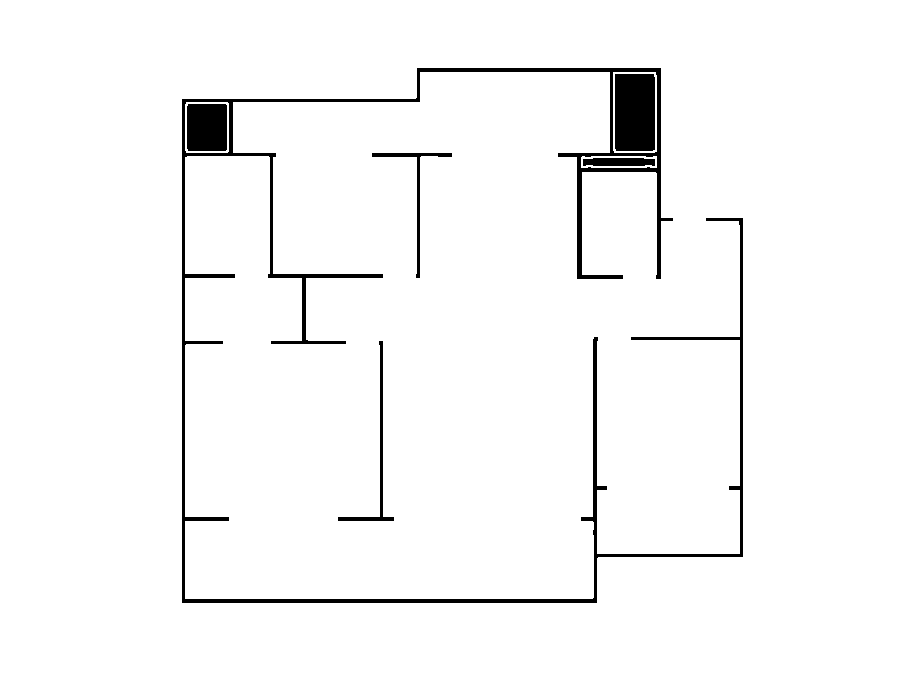

In [47]:
import cv2
import numpy as np

# 이미지 로딩
img = cv2.imread('wall.png', cv2.IMREAD_GRAYSCALE)

h, w = img.shape

# 이미지의 테두리가 흰색이 아닐 수도 있으므로 검정색으로 패딩
padded_img = cv2.copyMakeBorder(img, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=[0,0,0])

# (0, 0) 위치부터 시작하여 검은색 부분을 흰색으로 채움
cv2.floodFill(padded_img, None, (0,0), 255)

# 패딩 제거
filled_img = padded_img[1:h+1, 1:w+1]

# 결과 출력
display(Image.fromarray(filled_img))

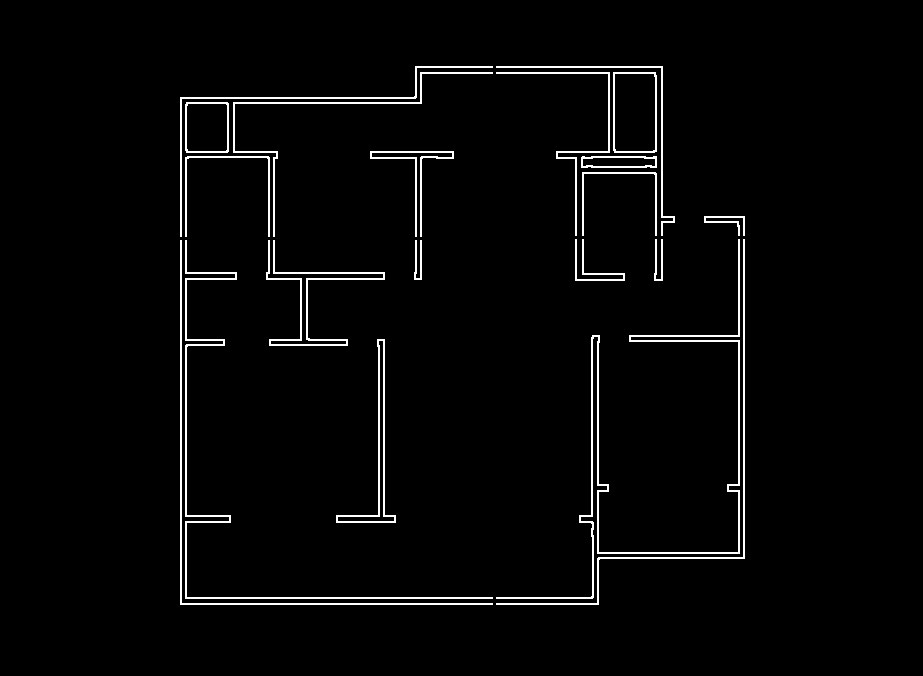

In [33]:
import cv2
import numpy as np

img = cv2.imread('wall.png', 0)
edges = cv2.Canny(img, 50, 150)

# Hough Line Transform
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)

average_rho_values = {}
average_count = {}

for rho, theta in lines[:,0]:
    # 임계값을 사용하여 선의 유사도를 측정
    key = round(theta, 2)
    if key not in average_rho_values:
        average_rho_values[key] = 0
        average_count[key] = 0
        
    average_rho_values[key] += rho
    average_count[key] += 1

# 평균화된 선 그리기
for theta in average_rho_values:
    average_rho = average_rho_values[theta] / average_count[theta]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * average_rho
    y0 = b * average_rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

display(Image.fromarray(img))

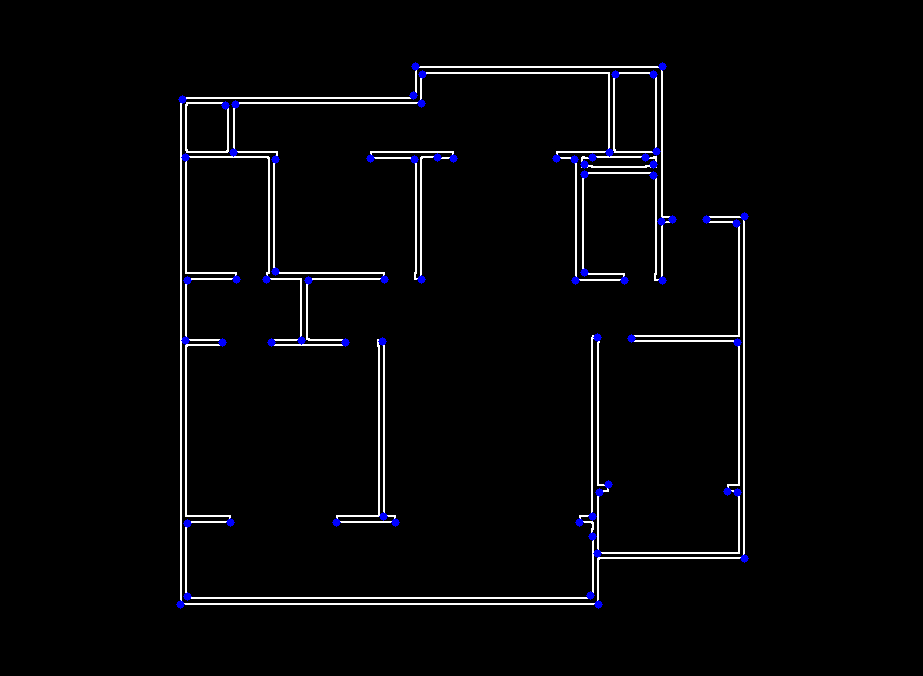

In [31]:
# 원본 흑백 이미지를 BGR 컬러 이미지로 변환
color_img = cv2.cvtColor(wall_img, cv2.COLOR_GRAY2BGR)

corners = cv2.goodFeaturesToTrack(wall_img, maxCorners=100, qualityLevel=0.01, minDistance=10)

# 검출된 코너들에 원 그리기
for corner in corners:
    x, y = map(int, corner.ravel())
    cv2.circle(color_img, (x, y), 4, (0, 0, 255), -1)  # 빨간색 원으로 표시

display(Image.fromarray(color_img))

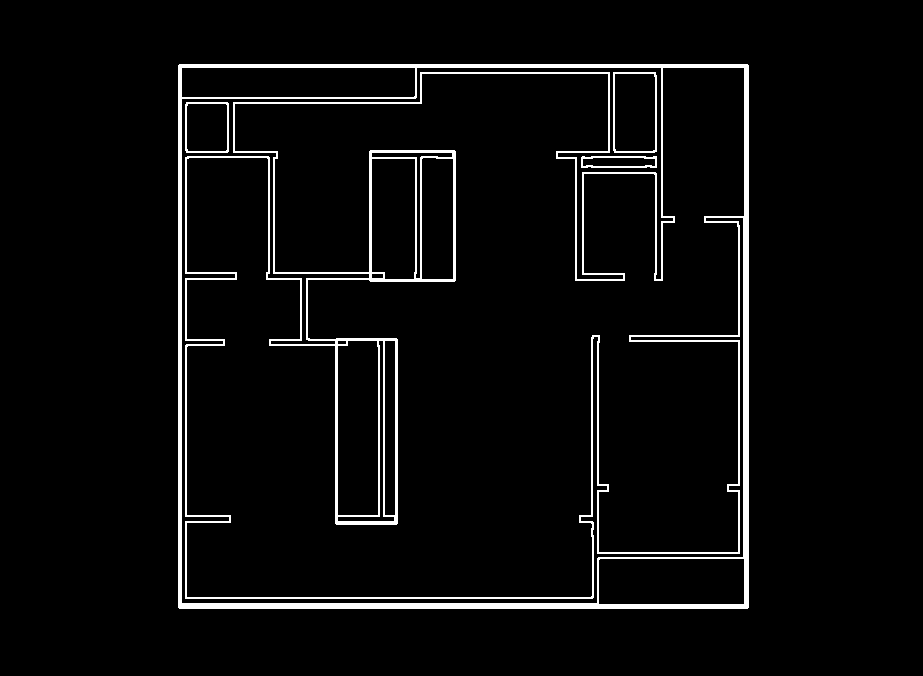

In [12]:
# 윤곽선 찾기
contours, _ = cv2.findContours(wall_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# 각 윤곽선에 대하여 바운딩 박스 그리기
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(wall_img, (x, y), (x+w, y+h), (255, 255, 0), 2) # 흰색 바운딩 박스

display(Image.fromarray(wall_img))
# 결과 이미지 저장 혹은 표시
# cv2.imwrite("output_image.jpg", img)
# cv2.imshow("Output Image", img)
#cv2.waitKey(0)

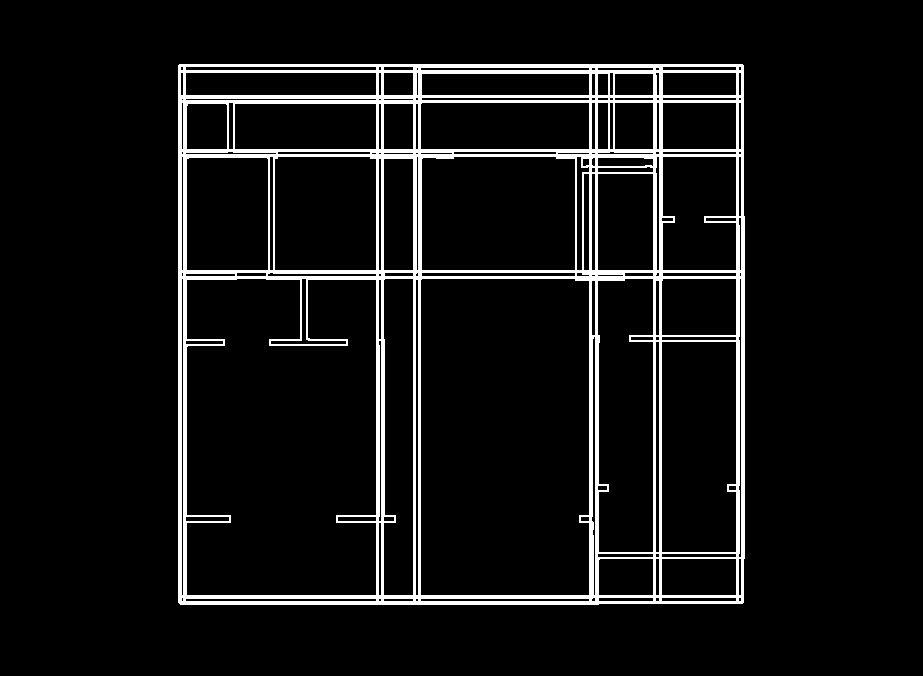

In [18]:
def draw_rectangle_from_lines(img, lines):
    if lines is None:
        return img
    lines = [l[0] for l in lines]
    horizontal_lines = []
    vertical_lines = []
    
    for rho, theta in lines:
        a = np.cos(theta)
        b = np.sin(theta)
        if b > 0.5:  # horizontal lines
            horizontal_lines.append((rho, theta))
        elif a > 0.5:  # vertical lines
            vertical_lines.append((rho, theta))

    # Sort lines
    horizontal_lines = sorted(horizontal_lines, key=lambda x: x[0])
    vertical_lines = sorted(vertical_lines, key=lambda x: x[0])
    
    # Draw the rectangle
    if len(horizontal_lines) > 1 and len(vertical_lines) > 1:
        for i in range(0, len(horizontal_lines)-1):
            for j in range(0, len(vertical_lines)-1):
                pt1 = (int(vertical_lines[j][0] / np.cos(vertical_lines[j][1])), int(horizontal_lines[i][0] / np.sin(horizontal_lines[i][1])))
                pt2 = (int(vertical_lines[j+1][0] / np.cos(vertical_lines[j+1][1])), int(horizontal_lines[i+1][0] / np.sin(horizontal_lines[i+1][1])))
                cv2.rectangle(img, pt1, pt2, (255, 255, 255), 2)

    return img

# 이미지 불러오기
# image_path = "path_to_your_image.jpg"
# img = cv2.imread(image_path)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# # 이진화 (binary thresholding)
# _, binary = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

# Canny edge detection
edges = cv2.Canny(wall_img, 50, 150)

# Hough line transformation
lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)  # Adjust the last parameter for sensitivity

# 사각형 그리기
output_img = draw_rectangle_from_lines(wall_img.copy(), lines)
display(Image.fromarray(output_img))

# 결과 이미지 저장 혹은 표시
# cv2.imwrite("output_image.jpg", output_img)
#cv2.imshow("Output Image", output_img)
#cv2.waitKey(0)

# Detect Rooms

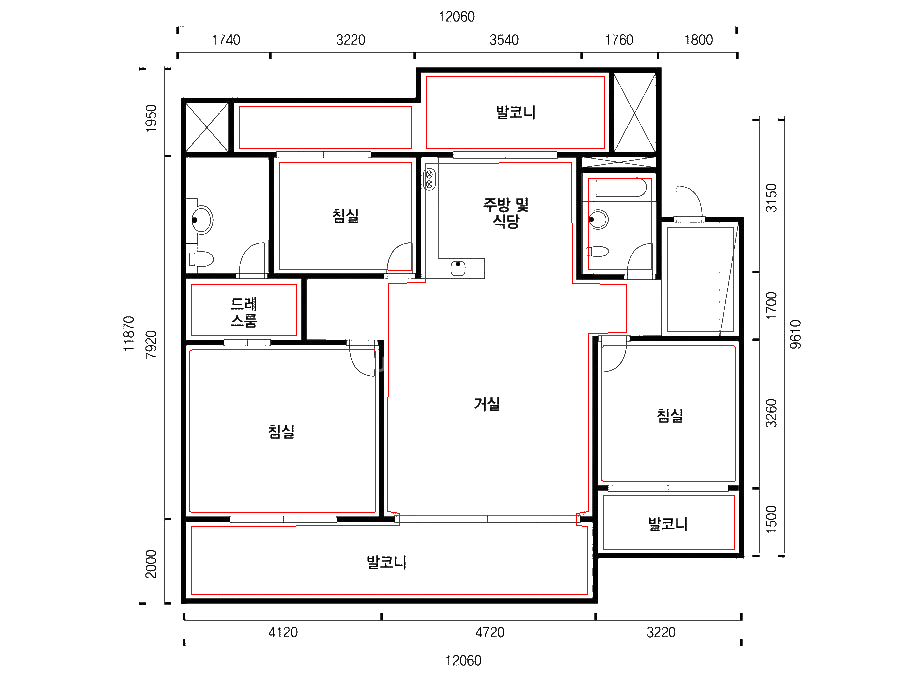

In [50]:
# Create new blank image
blank_image = img.copy()

gray = ~wall_img

# Find rooms
rooms, colored_rooms = detect.find_rooms(gray)

gray_rooms = cv2.cvtColor(colored_rooms, cv2.COLOR_BGR2GRAY)

boxes, blank_image = detect.precise_boxes(
    gray_rooms, blank_image, color=(255, 0, 0)
)

# Display
display(Image.fromarray(blank_image))

# Detect Windows & Doors

## Detect Details

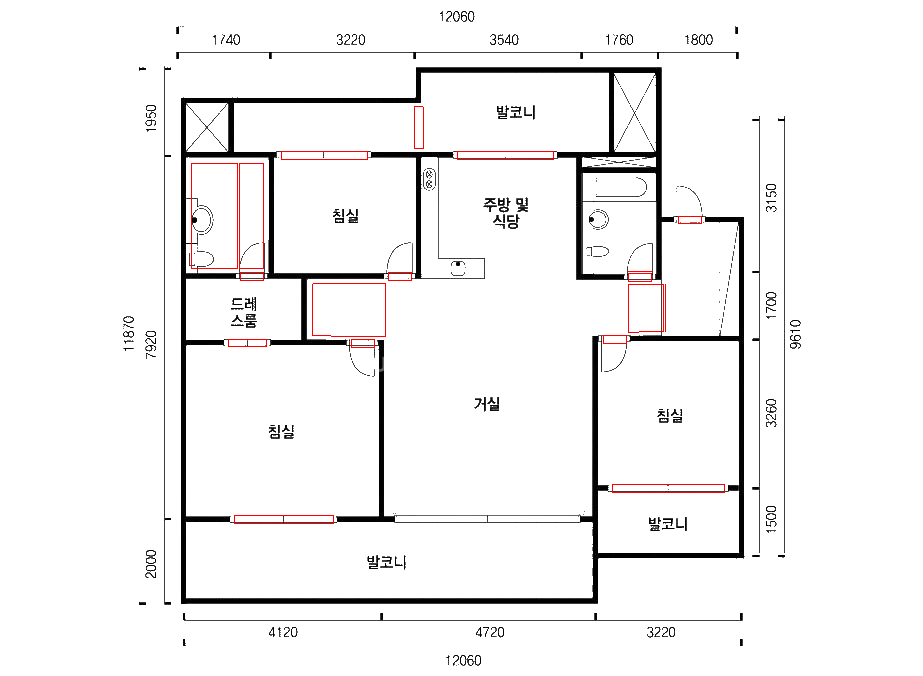

In [51]:
# Create new blank image
blank_image = img.copy()

doors, colored_doors = detect.find_details(gray.copy())
gray_details = cv2.cvtColor(colored_doors, cv2.COLOR_BGR2GRAY)
boxes, blank_image = detect.precise_boxes(
    gray_details, blank_image, color=(255, 0, 0)
)

# Display
display(Image.fromarray(blank_image))

## Detect Doors

The door detection uses ORB feature extraction. See below how features relate between the door model and the floorplan. Additional calculations are needed to also place the doors at correct position, rotation and scale. We use five points per door to get an OK accuracy.

The code for this example can be found in `Development Center/FloorplanLibDemo/find_windows_and_doors.py`.

![door_feature](Images/Demos/door_feature_extraction.PNG)

## Detect windows

The final step of the detection is to distinguish windows from the details detections. We do that by comparing the positions of each door with the details detections. See result below.

The code for this example can be found in `Development Center/FloorplanLibDemo/find_windows_and_doors.py`.

![door_windows](Images/Demos/windows_and_doors.PNG)

# Generate storage data files

Now that all detections are done the data must be saved, because generally the project executes in two instances. The first handles the input images with openCV and the other part is executed within the Blender program. In order to share data between the two, all necessary data is stored in .txt files under the `./Data/<id>` folder. Where ID is the generated incremented id of the current floorplan.

For each detection a horizontal and vertical file is saved for faces and verts. Verts describe the position of each object corner to be created. And faces describe the order of which the positions should be drawn. This is important in computer graphics!

There is also a transform file containing information about the stored floorplan data. An example can look like this:
`{"position": [0, 0, 0], "rotation": [0, 0, 0], "shape": [10.77, 5.06, 1]}`


# Generate Blender file

The next step is to generate the 3d model from the stored data. We do this by creating a `bpy` python script and executing it within the blender application. This requires blender to be installed on your device. All blender scripts are located in `Blender/` folder. All objects in the floorplan is stored in an appropriate structure to help with organization of the 3d model.

# Generate multi level floorplan / Stacking

There are two ways of generating multiple floorplans at once.
Eighter use simple stacking along an axis or use the cylindric stacking which will be centered and rotated around a point.
See the `Stacking` folders for examples of how to use them.


# Reformat blender project

Sometimes it is interesing to generate specific object formats directly instead of doing it by hand in blender. Therefore we have added a solution to say which format the model should be saved as. For instance `.obj` to be imported directly into Unity or Unreal Engine.

# Floorplan To Blender Server 

In an attempt to make the library more accessible a RMI server implementation was created where images can be sent to the server and models generated and downloaded. See more in `Server/` folder.

![swagger](../Images/Demos/swaggerdemo.gif)

# Docker

To make the implementation useable, save and reliable a dockerfile, docker-compose and connection to dockerhub exist. The image can run in three modes. Server, document and single script mode. The server mode is used for hosting the FTBL Server implementation. The document mode starts this notebook on localhost. The single script mode runs the script once in a secure environment. 

There are many advantages of using containers and I hope the docker image will be helpful.

# Usages in other projects

The models can be used in many ways. I have for instance used unity and AR foundation to implement a AR implementation to better interact with the floorplan models. See more below.

## Unity AR foundation

The code for this project is shared in a separate open source project.

<p align="left">
  <img width="460" height="300" src="../Images/Demos/ardemo.gif">
</p>

### AR foundation real life scaling of floorplans

<p align="left">
  <img width="460" height="300" src="../Images/Demos/arrealifedemo.gif">
</p>

### AR foundation interior design of floorplans

<p align="left">
  <img width="460" height="300" src="../Images/Demos/PlaceObjectInRoomDemo.gif">
</p>

### AR foundation with MediaPipe Hands interactions

<p align="left">
  <img width="460" height="300" src="../Images/Demos/InteractDemo.gif">
</p>


## Blender Plugin

It has been discussed to create a direct plugin for this project in blender, to be more accessible. This might be added in the future also.

# Thank You

Thanks for using the implementation.

Best regards,

@grebtsew